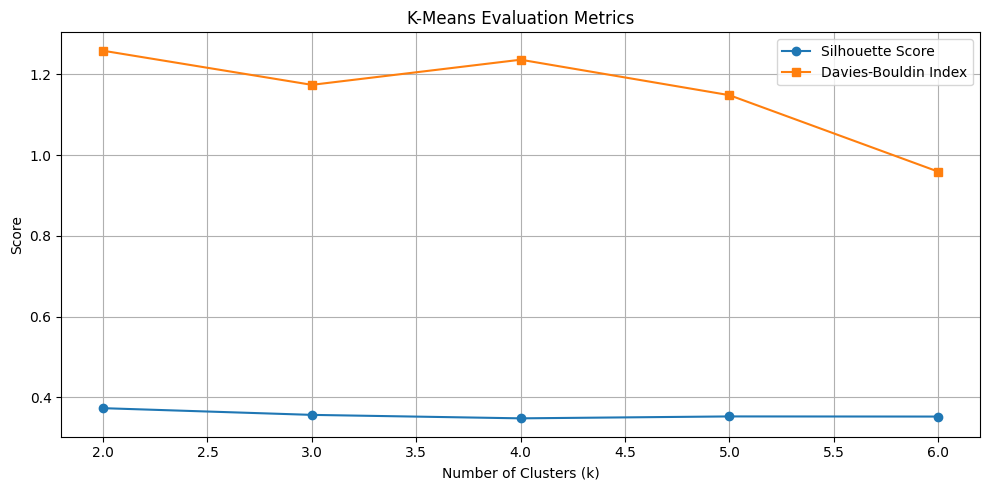

In [21]:
# ICRISAT Dataset Clustering using K-Means and DBSCAN

#step 1: import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

## Step 2: Load the dataset and drop non-feature columns

# Data Set
file_name = "ICRISAT.csv"

# Drop only the columns that exist in the DataFrame
non_feature_cols = [col for col in ['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name'] if col in df.columns]
features = df.drop(columns=non_feature_cols)

# Step 3: Standardize the features
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


# ---- K-Means Clustering ----
sil_scores = []
dbi_scores = []
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))
    dbi_scores.append(davies_bouldin_score(X_scaled, labels))

# Plot Silhouette & DBI Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, sil_scores, marker='o', label='Silhouette Score')
plt.plot(k_range, dbi_scores, marker='s', label='Davies-Bouldin Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('K-Means Evaluation Metrics')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Project Title: Clustering Agricultural Data Using K-Means and DBSCAN: A Comparative Analysis on the ICRISAT Dataset
Student Name: Marihuchegowda Durgaprasad
Student ID Number: 23097507
Github Code: https://github.com/MDURGAPRASAD-07/ML


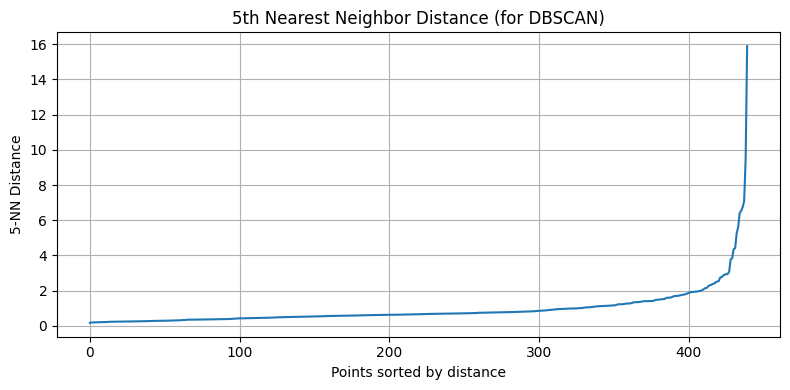

In [26]:
# Fit KMeans with optimal k (e.g., k=3)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# ---- DBSCAN Clustering ----

# Step 4: Estimate eps using the k-distance plot
# Use k-distance graph to find epsilon
neighbors = NearestNeighbors(n_neighbors=5)
neigh_fit = neighbors.fit(X_scaled)
distances, indices = neigh_fit.kneighbors(X_scaled)

# Sort and plot k-distance
k_distances = np.sort(distances[:, 4])
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.title('5th Nearest Neighbor Distance (for DBSCAN)')
plt.xlabel('Points sorted by distance')
plt.ylabel('5-NN Distance')
plt.grid(True)
plt.tight_layout()
plt.show()



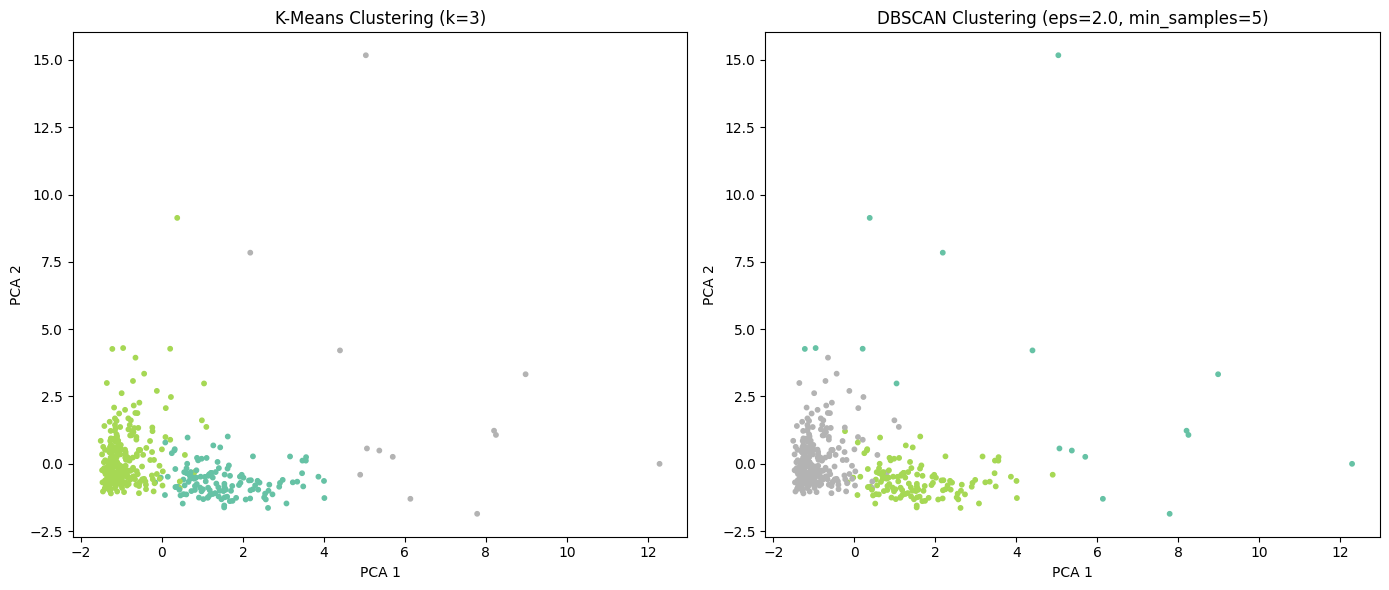

In [27]:
# Step 5: Try multiple eps values to find the best Silhouette Score
# Automatically test multiple eps values to find a better DBSCAN setting
best_eps = None
best_sil = -1
for eps in np.arange(2, 10, 0.5):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    core_mask = labels != -1
    unique_labels = set(labels[core_mask])
    if len(unique_labels) > 1:
        sil = silhouette_score(X_scaled[core_mask], labels[core_mask])
        if sil > best_sil:
            best_sil = sil
            best_eps = eps

# Step 6: Apply DBSCAN with the best eps
# Fit DBSCAN using best eps found
if best_eps:
    dbscan = DBSCAN(eps=best_eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_scaled)
else:
    dbscan = DBSCAN(eps=6, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    best_eps = 6

# ---- PCA Visualization ----
# Step 7: Visualize DBSCAN clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# K-Means
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='Set2', s=10)
axs[0].set_title('K-Means Clustering (k=3)')
axs[0].set_xlabel('PCA 1')
axs[0].set_ylabel('PCA 2')

# DBSCAN
axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='Set2', s=10)
axs[1].set_title(f'DBSCAN Clustering (eps={best_eps}, min_samples=5)')
axs[1].set_xlabel('PCA 1')
axs[1].set_ylabel('PCA 2')

plt.tight_layout()
plt.show()


In [28]:

# ---- Evaluation ----
print("K-Means Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("K-Means DBI:", davies_bouldin_score(X_scaled, kmeans_labels))

# Step 8: Evaluate DBSCAN clustering quality
# Filter DBSCAN noise (-1) for metrics
core_mask = dbscan_labels != -1
unique_labels = set(dbscan_labels[core_mask])

if len(unique_labels) > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(X_scaled[core_mask], dbscan_labels[core_mask]))
    print("DBSCAN DBI:", davies_bouldin_score(X_scaled[core_mask], dbscan_labels[core_mask]))
else:
    print("DBSCAN did not form more than one cluster for evaluation.")


K-Means Silhouette Score: 0.3567685389017652
K-Means DBI: 1.1736367961162066
DBSCAN Silhouette Score: 0.3858633932787703
DBSCAN DBI: 1.1457112106851999
